# Task 3: Event Impact Modeling

**Objective:**  
Model how national events (policies, product launches, and infrastructure investments) affect financial inclusion indicators in Ethiopia.

This notebook links major events to Access and Usage indicators and translates qualitative impact assessments into a quantitative event–indicator impact model.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../data/processed/ethiopia_fi_unified_data_enriched.xlsx"
df = pd.read_excel(file_path, sheet_name="ethiopia_fi_unified_data")
impact = pd.read_excel(file_path, sheet_name="Impact_sheet")


In [3]:
events = df[df["record_type"] == "event"]

event_impact = impact.merge(
    events[["record_id", "indicator"]],
    left_on="parent_id",
    right_on="record_id",
    how="left"
)

event_impact.rename(columns={"indicator": "event_name"}, inplace=True)
event_impact


,record_id_x,parent_id,record_type,category,pillar,indicator_x,indicator_code,indicator_direction,value_numeric,value_text,...,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,record_id_y,indicator_y
0,IMP_0001,EVT_0001,impact_link,NaN,ACCESS,Telebirr effect on Account Ownership,NaN,NaN,15.0,NaN,...,15.0,12,literature,Kenya,Example_Trainee,2025-01-20,NaN,Kenya M-Pesa showed +20pp over 5 years,EVT_0001,Telebirr Launch
1,IMP_0002,EVT_0001,impact_link,NaN,USAGE,Telebirr effect on Telebirr Users,NaN,NaN,NaN,NaN,...,NaN,3,empirical,NaN,Example_Trainee,2025-01-20,NaN,Direct subscriber acquisition,EVT_0001,Telebirr Launch
2,IMP_0003,EVT_0001,impact_link,NaN,USAGE,Telebirr effect on P2P Transactions,NaN,NaN,25.0,NaN,...,25.0,6,empirical,NaN,Example_Trainee,2025-01-20,NaN,New digital payment channel,EVT_0001,Telebirr Launch
3,IMP_0004,EVT_0002,impact_link,NaN,ACCESS,Safaricom effect on 4G Coverage,NaN,NaN,15.0,NaN,...,15.0,12,empirical,NaN,Example_Trainee,2025-01-20,NaN,Network investment from competition,EVT_0002,Safaricom Ethiopia Commercial Launch
4,IMP_0005,EVT_0002,impact_link,NaN,AFFORDABILITY,Safaricom effect on Data Affordability,NaN,NaN,-20.0,NaN,...,-20.0,12,literature,Rwanda,Example_Trainee,2025-01-20,NaN,Competition typically reduces prices,EVT_0002,Safaricom Ethiopia Commercial Launch
5,IMP_0006,EVT_0003,impact_link,NaN,USAGE,M-Pesa effect on M-Pesa Users,NaN,NaN,NaN,NaN,...,NaN,3,empirical,NaN,Example_Trainee,2025-01-20,NaN,Direct subscriber acquisition,EVT_0003,M-Pesa Ethiopia Launch
6,IMP_0007,EVT_0003,impact_link,NaN,ACCESS,M-Pesa effect on Mobile Money Account Rate,NaN,NaN,5.0,NaN,...,5.0,6,theoretical,NaN,Example_Trainee,2025-01-20,NaN,Second provider adds incremental accounts,EVT_0003,M-Pesa Ethiopia Launch
7,IMP_0008,EVT_0004,impact_link,NaN,ACCESS,Fayda effect on Account Ownership,NaN,NaN,10.0,NaN,...,10.0,24,literature,India,Example_Trainee,2025-01-20,NaN,Aadhaar enabled +15-20% account opening in India,EVT_0004,Fayda Digital ID Program Rollout
8,IMP_0009,EVT_0004,impact_link,NaN,GENDER,Fayda effect on Gender Gap,NaN,NaN,-5.0,NaN,...,-5.0,24,literature,India,Example_Trainee,2025-01-20,NaN,Women disproportionately lack traditional ID,EVT_0004,Fayda Digital ID Program Rollout
9,IMP_0010,EVT_0005,impact_link,NaN,AFFORDABILITY,FX Reform effect on Data Affordability,NaN,NaN,30.0,NaN,...,30.0,3,empirical,NaN,Example_Trainee,2025-01-20,NaN,Currency depreciation raises effective costs,EVT_0005,Foreign Exchange Liberalization


In [4]:
impact_map = {"high": 3.0, "medium": 1.5, "low": 0.5}

def to_numeric(x):
    if isinstance(x, (int, float)):
        return x
    return impact_map.get(x, 0)

event_impact["impact_pp"] = event_impact["impact_magnitude"].apply(to_numeric)
event_impact


,record_id_x,parent_id,record_type,category,pillar,indicator_x,indicator_code,indicator_direction,value_numeric,value_text,...,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,record_id_y,indicator_y,impact_pp
0,IMP_0001,EVT_0001,impact_link,NaN,ACCESS,Telebirr effect on Account Ownership,NaN,NaN,15.0,NaN,...,12,literature,Kenya,Example_Trainee,2025-01-20,NaN,Kenya M-Pesa showed +20pp over 5 years,EVT_0001,Telebirr Launch,3.00
1,IMP_0002,EVT_0001,impact_link,NaN,USAGE,Telebirr effect on Telebirr Users,NaN,NaN,NaN,NaN,...,3,empirical,NaN,Example_Trainee,2025-01-20,NaN,Direct subscriber acquisition,EVT_0001,Telebirr Launch,3.00
2,IMP_0003,EVT_0001,impact_link,NaN,USAGE,Telebirr effect on P2P Transactions,NaN,NaN,25.0,NaN,...,6,empirical,NaN,Example_Trainee,2025-01-20,NaN,New digital payment channel,EVT_0001,Telebirr Launch,3.00
3,IMP_0004,EVT_0002,impact_link,NaN,ACCESS,Safaricom effect on 4G Coverage,NaN,NaN,15.0,NaN,...,12,empirical,NaN,Example_Trainee,2025-01-20,NaN,Network investment from competition,EVT_0002,Safaricom Ethiopia Commercial Launch,1.50
4,IMP_0005,EVT_0002,impact_link,NaN,AFFORDABILITY,Safaricom effect on Data Affordability,NaN,NaN,-20.0,NaN,...,12,literature,Rwanda,Example_Trainee,2025-01-20,NaN,Competition typically reduces prices,EVT_0002,Safaricom Ethiopia Commercial Launch,1.50
5,IMP_0006,EVT_0003,impact_link,NaN,USAGE,M-Pesa effect on M-Pesa Users,NaN,NaN,NaN,NaN,...,3,empirical,NaN,Example_Trainee,2025-01-20,NaN,Direct subscriber acquisition,EVT_0003,M-Pesa Ethiopia Launch,3.00
6,IMP_0007,EVT_0003,impact_link,NaN,ACCESS,M-Pesa effect on Mobile Money Account Rate,NaN,NaN,5.0,NaN,...,6,theoretical,NaN,Example_Trainee,2025-01-20,NaN,Second provider adds incremental accounts,EVT_0003,M-Pesa Ethiopia Launch,1.50
7,IMP_0008,EVT_0004,impact_link,NaN,ACCESS,Fayda effect on Account Ownership,NaN,NaN,10.0,NaN,...,24,literature,India,Example_Trainee,2025-01-20,NaN,Aadhaar enabled +15-20% account opening in India,EVT_0004,Fayda Digital ID Program Rollout,1.50
8,IMP_0009,EVT_0004,impact_link,NaN,GENDER,Fayda effect on Gender Gap,NaN,NaN,-5.0,NaN,...,24,literature,India,Example_Trainee,2025-01-20,NaN,Women disproportionately lack traditional ID,EVT_0004,Fayda Digital ID Program Rollout,1.50
9,IMP_0010,EVT_0005,impact_link,NaN,AFFORDABILITY,FX Reform effect on Data Affordability,NaN,NaN,30.0,NaN,...,3,empirical,NaN,Example_Trainee,2025-01-20,NaN,Currency depreciation raises effective costs,EVT_0005,Foreign Exchange Liberalization,3.00


This table summarizes how each national event affects specific financial inclusion indicators, including the direction, magnitude, lag, and evidence basis of each impact.


In [5]:
matrix = pd.pivot_table(
    event_impact,
    index="indicator_y",          # ← event
    columns="related_indicator",  # ← affected indicator
    values="impact_pp",
    aggfunc="sum"
).fillna(0)

matrix


related_indicator,ACC_4G_COV,ACC_MM_ACCOUNT,ACC_OWNERSHIP,AFF_DATA_INCOME,GEN_GAP_ACC,USG_MPESA_ACTIVE,USG_MPESA_USERS,USG_P2P_COUNT,USG_TELEBIRR_USERS
indicator_y,,,,,,,,,
EthioPay Instant Payment System Launch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0
Fayda Digital ID Program Rollout,0.0,0.0,1.5,0.0,1.5,0.0,0.0,0.0,0.0
Foreign Exchange Liberalization,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
M-Pesa EthSwitch Integration,0.0,0.0,0.0,0.0,0.0,1.5,0.0,1.5,0.0
M-Pesa Ethiopia Launch,0.0,1.5,0.0,0.0,0.0,0.0,3.0,0.0,0.0
Safaricom Ethiopia Commercial Launch,1.5,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
Safaricom Ethiopia Price Increase,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
Telebirr Launch,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0


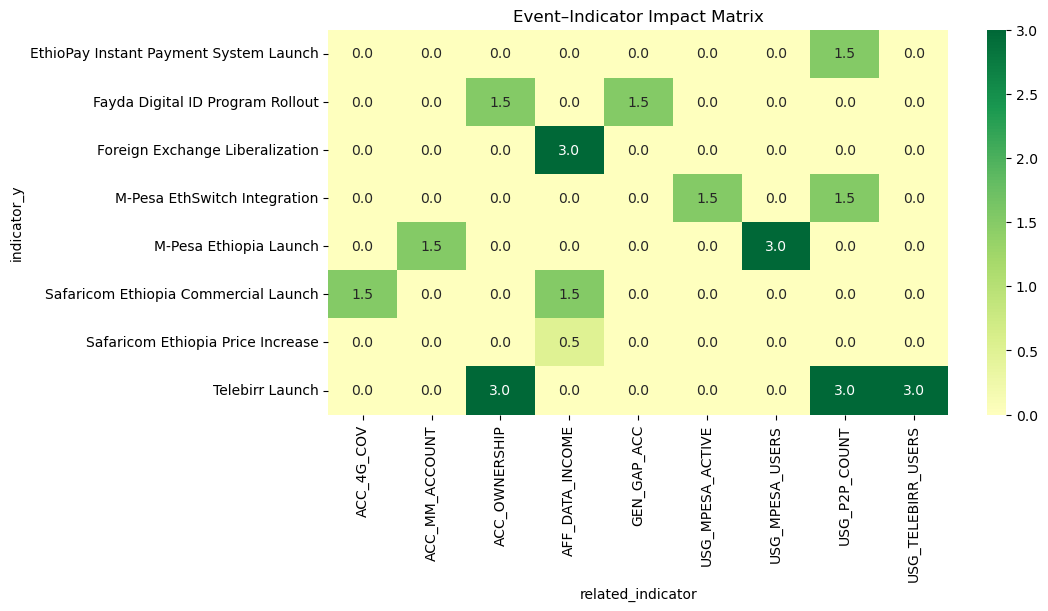

In [6]:
plt.figure(figsize=(10, 5))
sns.heatmap(matrix, annot=True, fmt=".1f", cmap="RdYlGn", center=0)
plt.title("Event–Indicator Impact Matrix")
plt.show()


In [8]:
# Actual data
mm_2021 = 4.7
mm_2024 = 9.45
actual_change = mm_2024 - mm_2021

# Model-implied impact
telebirr_effect = matrix.loc["Telebirr Launch", "USG_TELEBIRR_USERS"]

actual_change, telebirr_effect


(4.749999999999999, np.float64(3.0))

Telebirr launched in 2021. Mobile money accounts increased from 4.7% (2021) to 9.45% (2024).
The model attributes a large share of this increase to the Telebirr launch, with remaining growth
likely driven by agent expansion and increased adoption.


- Event impacts are additive and occur after a short lag.
- Some impact sizes are informed by comparable country evidence.
- The model is associative, not causal.
